# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
columns = ['Exam 1 Score', 'Exam 2 score', 'Result']
dataset = pd.read_csv('./ex2data1.txt', delimiter=',', header=None, names=columns)

In [7]:
X = dataset.loc[:, [columns[0], columns[1]]]
y = dataset.loc[:, [columns[2]]]

## Plot Data

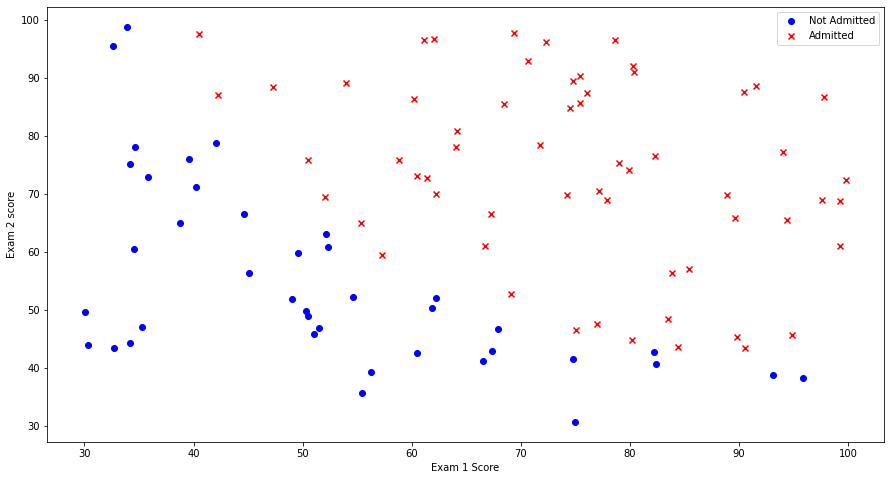

In [28]:
plt.figure(figsize=(15,8))

neg = X[y.Result == 0]
pos = X[y.Result == 1]

plt.scatter(neg.iloc[:,0].values,neg.iloc[:,1], c='b', marker='o', label='Not Admitted')
plt.scatter(pos.iloc[:,0].values,pos.iloc[:,1], c='r', marker='x', label='Admitted')
plt.legend()
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

## Logistic Regression Hypotesis

$$\large h_{\theta}(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$

$$\large g(z) = \frac{1}{1+e^{-z}}$$

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Logistic Regression cost Function (Binary Cross Entropy)

$$ \large J(\theta) = - \frac{1}{m} \sum^{m-1}_{i=0} Loss_i$$
$$ \large Loss_i =\sum_{i = 0}^{m-1} y^{(i)} log(h_{\theta} (x^{(i)})) + (1-y^{(i)}) log(1-h_{\theta}(x^{(i)})) $$

$$ \large J(\theta) = - \frac{1}{m} ((\log(g(X\theta)))^T y + (log(1-g(X\theta)))^T (1-y))$$

In [62]:
def computeCost(X,y,theta = np.zeros((X.shape[1],1))):
    m = X.shape[0]
    J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))
    return J

In [51]:
computeCost(X,y)

0.6931471805599453

## Gradient Descent

In [63]:
def gradientDescent(X,y, theta = np.zeros((X.shape[1],1)), alpha = 0.001, n_iters = 1000):
    theta_gd = np.copy(theta)
    m = X.shape[0]
    J = np.zeros((n_iters,1))
    for i in range(n_iters):
        J[i] = computeCost(X,y,theta_gd)
        h = sigmoid(X.dot(theta_gd))
        theta_gd = theta_gd - (alpha/m)*X.T.dot(h -y)
    return theta_gd,J

In [67]:
gradientDescent(X.values,y.values)

(array([[0.01042527],
        [0.00045203]]),
 array([[0.69314718],
        [0.69826887],
        [0.65969192],
        [0.66159672],
        [0.6488484 ],
        [0.64967706],
        [0.64310693],
        [0.64345943],
        [0.63953364],
        [0.6396511 ],
        [0.63711603],
        [0.6371131 ],
        [0.63539613],
        [0.63533264],
        [0.63413195],
        [0.63404074],
        [0.63318176],
        [0.63308124],
        [0.63245624],
        [0.63235667],
        [0.63189594],
        [0.63180279],
        [0.63145965],
        [0.63137555],
        [0.63111783],
        [0.63104373],
        [0.63084882],
        [0.63078466],
        [0.6306364 ],
        [0.63058158],
        [0.63046824],
        [0.6304219 ],
        [0.63033487],
        [0.63029603],
        [0.63022896],
        [0.63019663],
        [0.63014477],
        [0.63011801],
        [0.63007779],
        [0.63005575],
        [0.63002448],
        [0.63000641],
        [0.62998203],
        